In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
phone = pd.read_csv('data/smartphone_cleaned_v5.csv', sep=',')



In [3]:
phone = pd.read_csv('data/smartphone_cleaned_v5.csv', sep=',')

phone = phone.drop(['model'], axis=1)
phone = phone.drop(['brand_name'], axis=1)
phone = phone.drop(['resolution'], axis=1)
phone = phone.drop(['os'], axis=1)

phone = phone.dropna()

phone['rating'] = phone['rating'].fillna(61)


X = phone.drop(['rating'], axis=1)

Y = phone['rating']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_split=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.273972602739726


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model_RandForest = RandomForestClassifier()

model_LogisticR = LogisticRegression()

param_grid = {
    'n_estimators': [10, 50, 100, 200], # medziu kiekis
    'max_depth': [None, 10, 20], # sprendimu kiekis medyje
    'min_samples_split': [2, 5, 10] # minimalus pavyzdžių kiekis
}

grid_search_randF = GridSearchCV(estimator=model_RandForest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_randF.fit(X,Y)

grid_search_logisticR = GridSearchCV(estimator=model_RandForest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_logisticR.fit(X,Y)

print(f'Geriausi parametrai Random forest: {grid_search_randF.best_params_}')
print(f'Geriausias tikslumas Random forest: {grid_search_randF.best_score_}')

print(f'Geriausi parametrai LogisticR: {grid_search_logisticR.best_params_}')
print(f'Geriausias tikslumas LogisticR: {grid_search_logisticR.best_score_}')

c:\Users\sarun\OneDrive\Documents\Code\Testinei\mokymai\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\sarun\OneDrive\Documents\Code\Testinei\mokymai\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Geriausi parametrai Random forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Geriausias tikslumas Random forest: 0.2699391171993912
Geriausi parametrai LogisticR: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Geriausias tikslumas LogisticR: 0.27812024353120246


In [5]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import r2_score



polynomia = PolynomialFeatures(degree=2)
X_poly = polynomia.fit_transform(X)

# model = LinearRegression()
# model.fit(X_poly, Y)

# y_pred = model.predict(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)


0.798267548921546


In [6]:



X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=10000)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(len(y_pred))
print(len(y_test))
r2 = r2_score(y_test, y_pred)
print(r2)

91
91
0.6533584647018504


c:\Users\sarun\OneDrive\Documents\Code\Testinei\mokymai\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
phone = pd.read_csv('data/smartphone_v2.csv', sep=',')

In [8]:
features = list(phone.columns)
features.remove('model')
features.remove('resolution')
features

['brand_name',
 'price',
 'rating',
 'has_5g',
 'has_nfc',
 'has_ir_blaster',
 'processor_brand',
 'num_cores',
 'processor_speed',
 'battery_capacity',
 'fast_charging_available',
 'fast_charging',
 'ram_capacity',
 'internal_memory',
 'screen_size',
 'refresh_rate',
 'num_rear_cameras',
 'num_front_cameras',
 'os',
 'primary_camera_rear',
 'primary_camera_front',
 'extended_memory_available',
 'extended_upto']

In [9]:
categorical_features = ['brand_name', 'processor_brand', 'os']
phone[categorical_features] = phone[categorical_features].astype('category')

X = phone[features].drop('price', axis=1)
y = phone['price']

model = xgb.XGBRegressor(objective='reg:squarederror', enable_categorical=True, missing=np.nan, random_state=42)

results = cross_validate(model, X, y, return_train_score=True)
display(results)
display(f"MEAN Score: {results['test_score'].mean()}, std: {results['test_score'].std()}.")

{'fit_time': array([1.79759097, 0.06456804, 0.06456256, 0.06406689, 0.06806803]),
 'score_time': array([0.00551033, 0.00400376, 0.00551057, 0.00400639, 0.00451183]),
 'test_score': array([0.91933005, 0.8786877 , 0.27510556, 0.88070442, 0.44161164]),
 'train_score': array([0.99978299, 0.99980548, 0.99989098, 0.99973039, 0.99989132])}

'MEAN Score: 0.6790878760632577, std: 0.2675078685203391.'

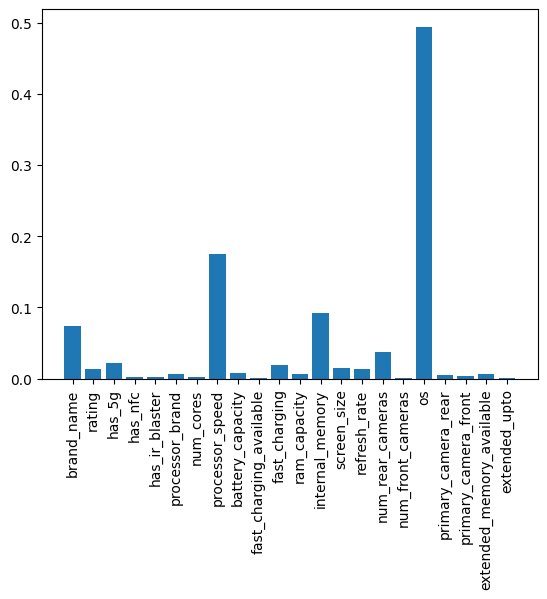

In [10]:
model.fit(X, y)
plt.bar(model.get_booster().feature_names, model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [11]:
sample = pd.Series({'brand_name': np.nan,'has_5g': True,'has_nfc': True, 'has_ir_blaster': False, 'processor_brand':np.nan,
                   'num_cores': 8,'processor_speed':np.nan,'battery_capacity': 4800,
                    'fast_charging_available': True, 'fast_charging': 30,'ram_capacity': 8,
                    'internal_memory': 128, 'screen_size': np.nan, 'refresh_rate': np.nan, 'num_rear_cameras': np.nan,
                    'num_front_cameras': np.nan, 'os':'android', 'primary_camera_rear': 50,
                    'primary_camera_front': np.nan, 'extended_memory_available': np.nan, 'extended_upto':np.nan,
                    'width': np.nan, 'height': np.nan
                   },
            index=['brand_name', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand',
                   'num_cores', 'processor_speed', 'battery_capacity',
                   'fast_charging_available', 'fast_charging', 'ram_capacity',
                   'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
                   'num_front_cameras', 'os', 'primary_camera_rear',
                   'primary_camera_front', 'extended_memory_available', 'extended_upto'
                   ])

sample_array = pd.DataFrame([sample], columns=sample.index )
sample_array[categorical_features] = sample_array[categorical_features].astype('category')
sample_array

,brand_name,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,NaN,True,True,False,NaN,8,NaN,4800,True,30,...,128,NaN,NaN,NaN,NaN,android,50,NaN,NaN,NaN


In [12]:
predicted_price = model.predict(sample_array)[0]
predicted_price

ValueError: feature_names mismatch: ['brand_name', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'extended_upto'] ['brand_name', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'extended_upto']
expected rating in input data